### Neural Networks
- Neural networks are computing systems vaguely imspired by the biological neural networks that constitute animal brains : 뉴럴네트워크는 인간의 신경망을 모방하였다. 하지만 역전파등을 활용하는면에서 꼭 그렇지만은 않다. 시작은 그랬지만 연구가 진행되면서 많이 갈라졌다
- Neural networks are tunction approximators that stack affine transformations followed by nonlinear transformations : 함수를 근사하는것

### Linear Nerual Networks
- Data : $D = \{(x_i, y_i)\}^N_{i=1}$


- Model :$\hat y = wx + b$


- Loss : $loss = \frac{1}{N}\displaystyle\sum^N_{i=1}(y_i - \hat y_i)$


- We compute the partial derivatives w.r.t the optimization variables


- $\frac{\partial loss}{\partial w}$, $\frac{\partial loss}{\partial b}$ 를 찾는다


- $\eta$ : eta, stepsize, 학습율(lr, learning rate)


- Then, we iteratively update the optimization variables


- $w \leftarrow w - \eta\frac{\partial loss}{\partial w}$


- $b \leftarrow b - \eta\frac{\partial loss}{\partial b}$


- Of course, we can handle multi dimensional input and output 

### Beyond Linear Neural Networks
- What if we stack more?
- We need nonlinearity
- Activation functions : ReLu, Sigmoid, Hyperbolic Tangent


### Multi-Layer Perceptron
- This class of architectures are often called multi-layer perceptron


- 물론 깊게 쌓을 수 있다.


- What about the loss functions
    - MSE : 제곱을 최적화 하는 것은 loss가 클 경우 최적화가 안될 수 있다.
    - CE : 보통 output은 one-hot vector로 이루어진다(0 or 1) 즉 해당 차원에 해당하는 출력값만 키운다. 
    - MLE : 확률적인 모델을 만들고 싶을 때(나이를 맞추고 싶을 때)

[레퍼런스](https://pytorch.org/docs/stable/nn.html#loss-functions) : Regression Task, Classification Task, Probabilistic Task의 Loss 함수(or 클래스)는 Pytorch에서 어떻게 구현이 되어있을까요?

## Multilayer Perceptron (MLP) 실습

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline

# 화질 좋아짐
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("device:[%s]."%(device))

PyTorch version:[1.10.1].
device:[cpu].


### Dataset

In [3]:
from torchvision import datasets,transforms
mnist_train = datasets.MNIST(root='./data/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test = datasets.MNIST(root='./data/',train=False,transform=transforms.ToTensor(),download=True)
print ("mnist_train:\n",mnist_train,"\n")
print ("mnist_test:\n",mnist_test,"\n")
print ("Done.")

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

mnist_train:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: ToTensor() 

mnist_test:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test
    StandardTransform
Transform: ToTensor() 

Done.


### Data Iterator


In [4]:
BATCH_SIZE = 256
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=BATCH_SIZE, shuffle=True, num_workers=1)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=BATCH_SIZE, shuffle=True, num_workers=1)
print ("Done.")

Done.


### Define the MLP model


In [5]:
class MultiLayerPerceptronClass(nn.Module):
    """
        Multilayer Perceptron (MLP) Class
    """
    def __init__(self,name='mlp',xdim=784,hdim=256,ydim=10):
        super(MultiLayerPerceptronClass,self).__init__()
        self.name = name
        self.xdim = xdim
        self.hdim = hdim # hidden dimension
        self.ydim = ydim
        self.lin_1 = nn.Linear(self.xdim, self.hdim)
        self.lin_2 = nn.Linear(self.hdim, self.ydim)
        self.init_param() # initialize parameters
        
    def init_param(self):
        nn.init.kaiming_normal_(self.lin_1.weight)
        nn.init.zeros_(self.lin_1.bias)
        nn.init.kaiming_normal_(self.lin_2.weight)
        nn.init.zeros_(self.lin_2.bias)

    def forward(self,x):
        net = x
        net = self.lin_1(net)
        net = F.relu(net)
        net = self.lin_2(net)
        return net

M = MultiLayerPerceptronClass(name='mlp',xdim=784,hdim=256,ydim=10).to(device)
loss = nn.CrossEntropyLoss()
optm = optim.Adam(M.parameters(),lr=1e-3)
print ("Done.")


Done.


### Simple Forward Path of the MLP Model


In [6]:
x_numpy = np.random.rand(2,784)
x_torch = torch.from_numpy(x_numpy).float().to(device)
y_torch = M.forward(x_torch) # forward path, forward를 안해도 돌아감
y_numpy = y_torch.detach().cpu().numpy() # torch tensor to numpy array
print ("x_numpy:\n",x_numpy)
print ("x_torch:\n",x_torch)
print ("y_torch:\n",y_torch)
print ("y_numpy:\n",y_numpy)

x_numpy:
 [[0.71713699 0.18746351 0.93739089 ... 0.53161379 0.37753133 0.73974527]
 [0.13140944 0.17112058 0.92123143 ... 0.62250442 0.1780154  0.68930004]]
x_torch:
 tensor([[0.7171, 0.1875, 0.9374,  ..., 0.5316, 0.3775, 0.7397],
        [0.1314, 0.1711, 0.9212,  ..., 0.6225, 0.1780, 0.6893]])
y_torch:
 tensor([[-1.5407, -0.3174, -0.6436,  0.2185,  0.5287,  0.8213, -0.4416, -0.6156,
          1.1217,  1.5552],
        [-1.6695, -0.5488,  0.0149, -0.3436,  0.2038,  0.5430, -0.4464,  0.3345,
          1.3384,  0.9811]], grad_fn=<AddmmBackward0>)
y_numpy:
 [[-1.5406756  -0.3174387  -0.6436422   0.21853547  0.52868056  0.8213383
  -0.44159955 -0.6155819   1.1216757   1.5552311 ]
 [-1.6694876  -0.54881936  0.01485583 -0.34364972  0.20382705  0.54299396
  -0.44636723  0.33445585  1.3383837   0.9811147 ]]


### Check Parameters

In [7]:
np.set_printoptions(precision=3)
n_param = 0
for p_idx,(param_name,param) in enumerate(M.named_parameters()):
    param_numpy = param.detach().cpu().numpy()
    n_param += len(param_numpy.reshape(-1))
    print ("[%d] name:[%s] shape:[%s]."%(p_idx,param_name,param_numpy.shape))
    print ("    val:%s"%(param_numpy.reshape(-1)[:5]))
print ("Total number of parameters:[%s]."%(format(n_param,',d')))

[0] name:[lin_1.weight] shape:[(256, 784)].
    val:[-0.057  0.059 -0.072  0.005 -0.026]
[1] name:[lin_1.bias] shape:[(256,)].
    val:[0. 0. 0. 0. 0.]
[2] name:[lin_2.weight] shape:[(10, 256)].
    val:[-0.006 -0.155  0.063  0.024 -0.154]
[3] name:[lin_2.bias] shape:[(10,)].
    val:[0. 0. 0. 0. 0.]
Total number of parameters:[203,530].


### Evaluation Function

In [8]:
def func_eval(model,data_iter,device):
    with torch.no_grad():
        model.eval() # evaluate (affects DropOut and BN)
        n_total,n_correct = 0,0
        for batch_in,batch_out in data_iter:
            y_trgt = batch_out.to(device)
            model_pred = model(batch_in.view(-1,28*28).to(device))
            _,y_pred = torch.max(model_pred.data,1)
            n_correct += (y_pred==y_trgt).sum().item()
            n_total += batch_in.size(0)
        val_accr = (n_correct/n_total)
        model.train() # back to train mode 
    return val_accr
print ("Done")

Done


### Initial Evaluation

In [11]:
M.init_param() # initialize parameters
train_accr = func_eval(M,train_iter,device)
test_accr = func_eval(M,test_iter,device)
print ("train_accr:[%.3f] test_accr:[%.3f]."%(train_accr,test_accr))

train_accr:[0.101] test_accr:[0.099].


### Train


In [13]:
print ("Start training.")
M.init_param() # initialize parameters
M.train()
EPOCHS,print_every = 10,1
for epoch in range(EPOCHS):
    loss_val_sum = 0
    for batch_in,batch_out in train_iter:
        # Forward path
        y_pred = M.forward(batch_in.view(-1, 28*28).to(device))
        loss_out = loss(y_pred,batch_out.to(device))
        # Update
        optm.zero_grad() # reset gradient
        loss_out.backward() # backpropagate
        optm.step() # optimizer update
        loss_val_sum += loss_out
    loss_val_avg = loss_val_sum/len(train_iter)
    # Print
    if ((epoch%print_every)==0) or (epoch==(EPOCHS-1)):
        train_accr = func_eval(M,train_iter,device)
        test_accr = func_eval(M,test_iter,device)
        print ("epoch:[%d] loss:[%.3f] train_accr:[%.3f] test_accr:[%.3f]."%
               (epoch,loss_val_avg,train_accr,test_accr))
print ("Done")  

Start training.
epoch:[0] loss:[0.374] train_accr:[0.947] test_accr:[0.946].
epoch:[1] loss:[0.166] train_accr:[0.965] test_accr:[0.960].
epoch:[2] loss:[0.118] train_accr:[0.973] test_accr:[0.968].
epoch:[3] loss:[0.090] train_accr:[0.981] test_accr:[0.972].
epoch:[4] loss:[0.072] train_accr:[0.984] test_accr:[0.975].
epoch:[5] loss:[0.057] train_accr:[0.987] test_accr:[0.975].
epoch:[6] loss:[0.049] train_accr:[0.991] test_accr:[0.978].
epoch:[7] loss:[0.039] train_accr:[0.992] test_accr:[0.979].
epoch:[8] loss:[0.034] train_accr:[0.993] test_accr:[0.978].
epoch:[9] loss:[0.028] train_accr:[0.996] test_accr:[0.979].
Done


### Test

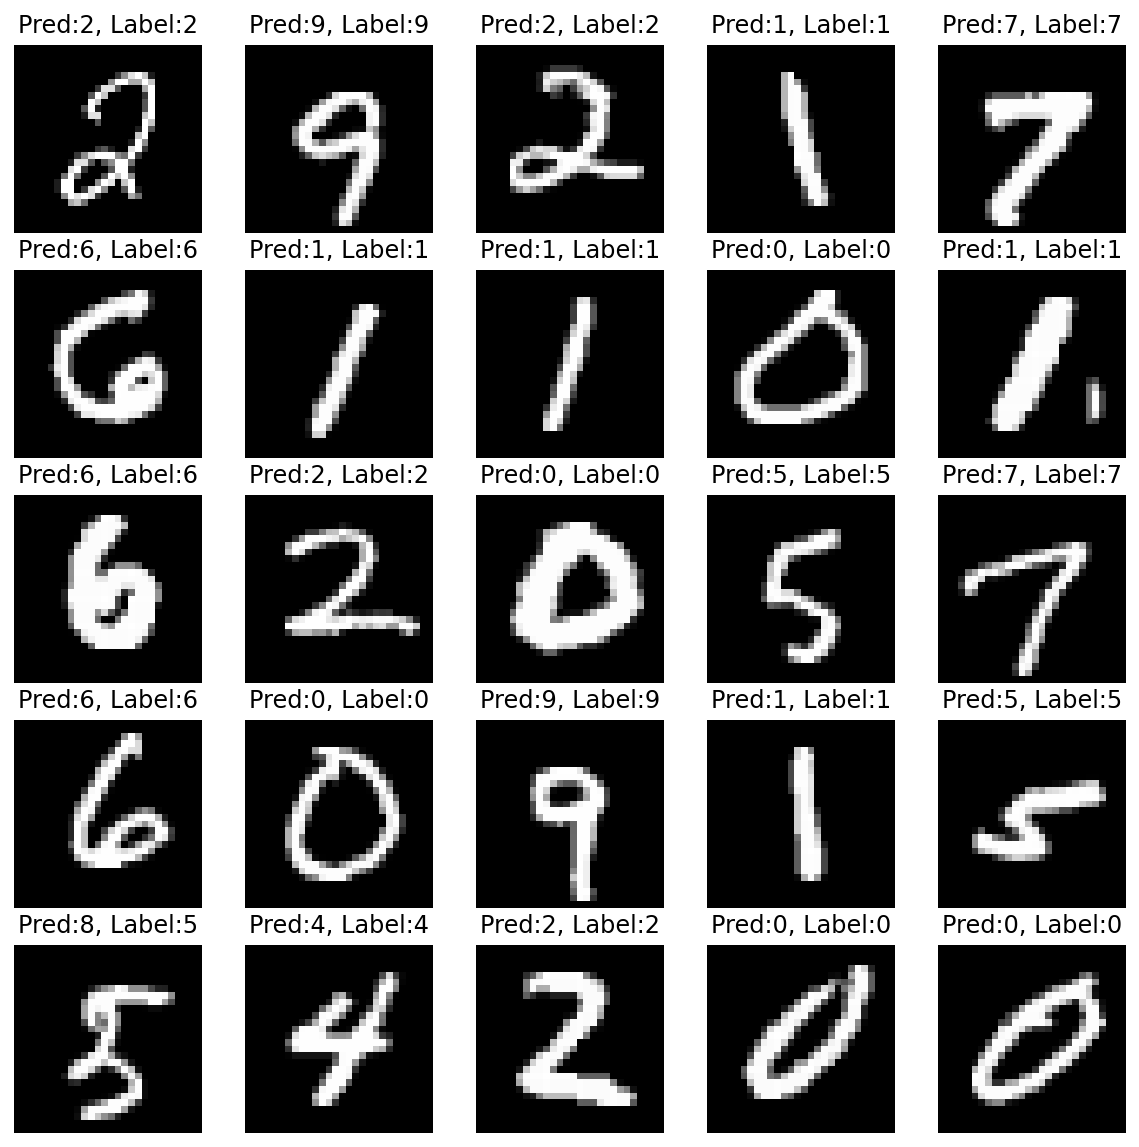

Done


In [15]:
n_sample = 25
sample_indices = np.random.choice(len(mnist_test.targets), n_sample, replace=False)
test_x = mnist_test.data[sample_indices]
test_y = mnist_test.targets[sample_indices]
with torch.no_grad():
    y_pred = M.forward(test_x.view(-1, 28*28).type(torch.float).to(device)/255.)
y_pred = y_pred.argmax(axis=1)
plt.figure(figsize=(10,10))
for idx in range(n_sample):
    plt.subplot(5, 5, idx+1)
    plt.imshow(test_x[idx], cmap='gray')
    plt.axis('off')
    plt.title("Pred:%d, Label:%d"%(y_pred[idx],test_y[idx]))
plt.show()    
print ("Done")